In [1]:
include("myfuncs.jl")
using Main.MyFuncs
using CairoMakie

In [92]:
function spikeSeries(Vs::Vector{Float64})
    spikes::Vector{Union{Int64, Missing}} = [missing for i in 0:dt:T]
    spikes[vcat([(Vs[1:end-1] .< 0) .& (Vs[2:end] .> 0)]..., Bool(0))] .= 1
    return spikes
end
function spikeSeries(VsMat::Matrix{Float64}; N=false, T=200, dt=0.01)
    if N == false 
        spikeindx::Matrix = hcat((VsMat[:, 1:end-1] .< 0) .& (VsMat[:, 2:end] .> 0), falses(size(VsMat)[1]))
        spikes = replace([([1:size(VsMat)[1]...] .* ones(size(VsMat)[1], size(VsMat)[2]) .* spikeindx)'...], 0 => missing)
        t = repeat([0:dt:T...], size(VsMat)[1])
        return t,spikes
    else
        spikeindx = hcat((VsMat[1:N, 1:end-1] .< 0) .& (VsMat[1:N, 2:end] .> 0), falses(N))
        spikes = replace([([1:N...] .* ones(N, size(VsMat)[2]) .* spikeindx)'...], 0 => missing)
        t = repeat([0:dt:T...], N)
        return t,spikes
    end
end

spikeSeries (generic function with 2 methods)

In [7]:
N_hh = HH{Float64}(N=N, p = 0.001)
Vs = Vector{Vector{Float64}}(undef, length([0:dt:T...]))
Vs2 = Vector{Vector{Float64}}(undef, length([0:dt:T...]))

for (i,t) in enumerate(0:dt:100)
    update!(N_hh, N_hh.param, Iexspre[i], dt; ḡC=0.00)
end


for (i,t) in enumerate(0:dt:T)
    update!(N_hh, N_hh.param, ones(N) * Iexs[i][1], dt; ḡC=.0)
    Vs[i] = N_hh.v[:]
end

N_hh = HH{Float64}(N=N, p = 0.001)
for (i,t) in enumerate(0:dt:100)
    update!(N_hh, N_hh.param, Iexspre[i], dt; ḡC=0.00)
end


for (i,t) in enumerate(0:dt:T)
    update!(N_hh, N_hh.param, ones(N) * Iexs[i][1], dt; ḡC=.33)
    Vs2[i] = N_hh.v[:]
end

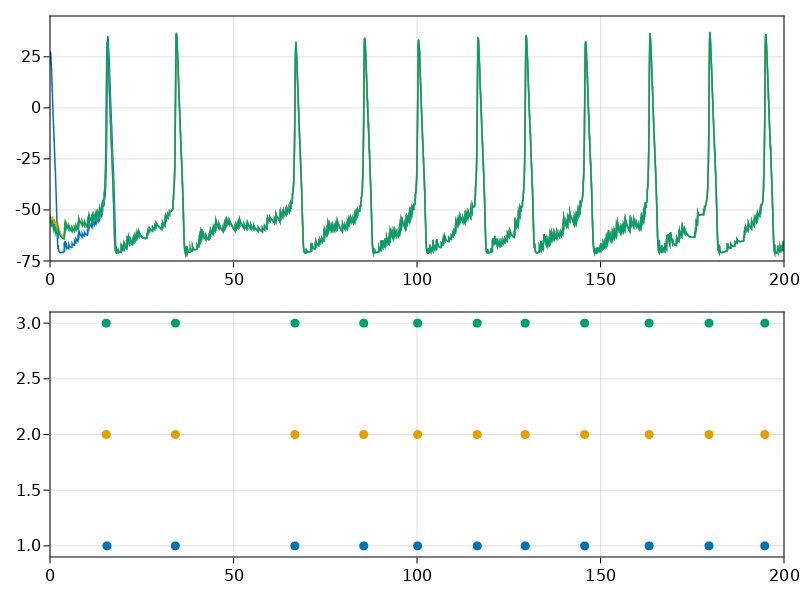

In [9]:
VsMat = hcat(Vs...);
IexsMat = hcat(Iexs...);

fig = Figure()
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[2,1])
# ax3 = Axis(fig[3,1])
lines!(ax1, [0:dt:T...],VsMat[3,:])
for row in eachrow(VsMat[N_hh.neighbors[3],:])
    lines!(ax1, [0:dt:T...],row)
end
ylims!(ax1, -75, 45)
# lines!(ax3, [0:dt:T...],IexsMat[3,:])
# for row in eachrow(IexsMat[N_hh.neighbors[3],:])
#     lines!(ax3, [0:dt:T...],row)
# end
scatter!(ax2, [0:dt:T...], spikeSeries(VsMat[3,:]))
for (i,row2) in enumerate(eachrow(VsMat[N_hh.neighbors[3],:]))
    # println(i)
    scatter!(ax2, [0:dt:T...], (i+1) .* spikeSeries(Vector{Float64}(row2)))
end
xlims!.([ax1,ax2], 0, T)
fig

# 部分节点展示

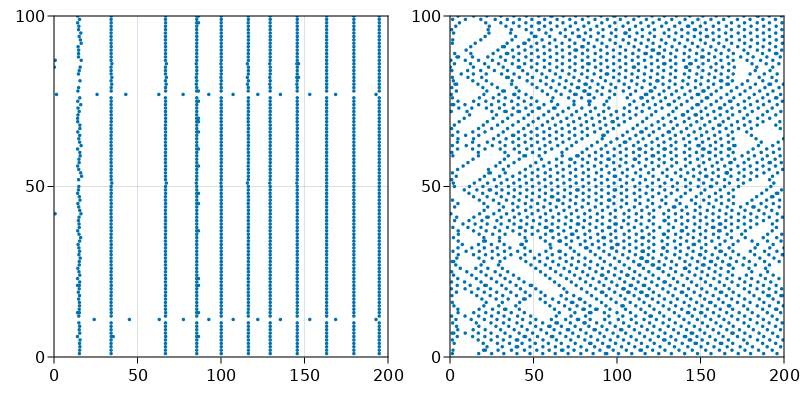

In [108]:
fig = Figure(resolution=(800,400))
ax1 = Axis(fig[1, 1])
ax2 = Axis(fig[1, 2])

scatter!(ax2, spikeSeries(hcat(Vs2...); N=100)..., markersize=3.5)
scatter!(ax1, spikeSeries(hcat(Vs...); N=100)..., markersize=3.5)
xlims!.([ax1,ax2], 0, 200)
ylims!.([ax1, ax2], 0, 100)
fig

# 全部节点展示

In [109]:
f2 = Figure(resolution=2 .*(800,400))
ax22 = Axis(f2[1,1],
    title=L"\bar{g}_{C} = .00"
)
ax23 = Axis(
    f2[1,2],
    title=L"\bar{g}_{C} = .33"
    )

for (i,row) in enumerate(eachrow(VsMat))
    # println(i)
    scatter!(ax22, [0:dt:T...], (i) .* spikeSeries(Vector{Float64}(row)),markersize=3.5, color=:gray)
end
for (i,row) in enumerate(eachrow(hcat(Vs2...)))
    # println(i)
    scatter!(ax23, [0:dt:T...], (i) .* spikeSeries(Vector{Float64}(row)),markersize=3.5, color=:gray)
end
xlims!.([ax22,ax23], 0, T)
ylims!.([ax22, ax23], 0.5, 1000.5)
# f2

InterruptException: InterruptException:

In [11]:
save("f2.png", f2)

CairoMakie.Screen{IMAGE}
